<a href="https://colab.research.google.com/github/meburns2011/Food-Sales-Predictions/blob/main/Food_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sales_predictions="/content/sales_predictions.csv"
sales_data=pd.read_csv(sales_predictions)
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [117]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
sales_data.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
sales_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [41]:
item_outlet=sales_data.groupby(['Item_Type','Outlet_Type'])['Item_Outlet_Sales'].mean()

Based on the below filters I think we can assume that all grocery stores are small and all supermarkets are medium which means that the size column is redundant. Based on this I will delete the size column.

In [4]:
size_filter=sales_data['Outlet_Type']=='Grocery Store'
type_filter=sales_data['Outlet_Size']=='Large'
sales_data.loc[size_filter&type_filter,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [ ]:
sales_data=sales_data.drop(columns=['Outlet_Size'])
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


Because so much of the weight column is missing I will also be droping this column. 

In [5]:
sales_data=sales_data.drop(columns=['Item_Weight'])
sales_data

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
sales_data.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
sales_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

Item Visibility

In [ ]:
sales_data['Item_Visibility'].max()

0.328390948

In [ ]:
sales_data['Item_Visibility'].min()

0.0

In [ ]:
sales_data['Item_Visibility'].mean()

0.06613202877895127

Item_MRP

In [ ]:
sales_data['Item_MRP'].max()

266.8884

In [ ]:
sales_data['Item_MRP'].min()

31.29

In [ ]:
sales_data['Item_MRP'].mean()

140.9927819781768

Outlet_Establishment_Year

In [ ]:
sales_data['Outlet_Establishment_Year'].max()

2009

In [ ]:
sales_data['Outlet_Establishment_Year'].min()

1985

In [ ]:
sales_data['Outlet_Establishment_Year'].mean()

1997.8318667135984

Item_Outlet_Sales

In [ ]:
sales_data['Item_Outlet_Sales'].max()

13086.9648

In [ ]:
sales_data['Item_Outlet_Sales'].min()

33.29

In [ ]:
sales_data['Item_Outlet_Sales'].mean()

2181.2889135750365

Checking each category for unique descriptions

In [166]:
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

I can see that there should only be two categories so I will be changing them to low fat and regular.

In [53]:
sales_data['Item_Fat_Content']=sales_data['Item_Fat_Content'].replace('Low Fat','low fat')

In [54]:
sales_data['Item_Fat_Content']=sales_data['Item_Fat_Content'].replace('LF','low fat')

In [55]:
sales_data['Item_Fat_Content']=sales_data['Item_Fat_Content'].replace('Regular','regular')

In [56]:
sales_data['Item_Fat_Content']=sales_data['Item_Fat_Content'].replace('reg','regular')

In [57]:
sales_data['Item_Fat_Content'].value_counts()

low fat    5517
regular    3006
Name: Item_Fat_Content, dtype: int64

In [58]:
sales_data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [59]:
sales_data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
sales_data.corr()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,-0.128625,0.567574,-0.049135,1.000000


In [ ]:
corr=sales_data.corr()

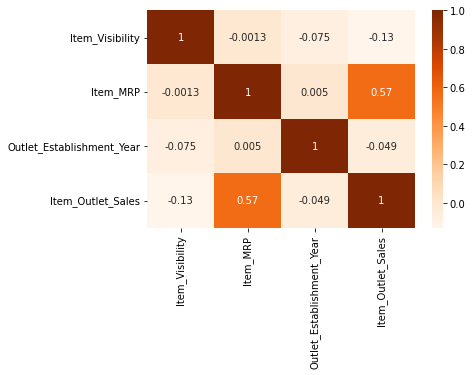

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr, cmap = 'Oranges', annot=True)
plt.show()

So far it looks like the only strong correlation is between the list price of the product and the sales price (which we will be predicting). It's a positive correlation so does this mean that more expensive items are likely to have more sales?

> Indented block



I would like to look at how well each item type is selling at the different types of stores. For example do grocery stores sell more fruits and veggies than a large box store.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

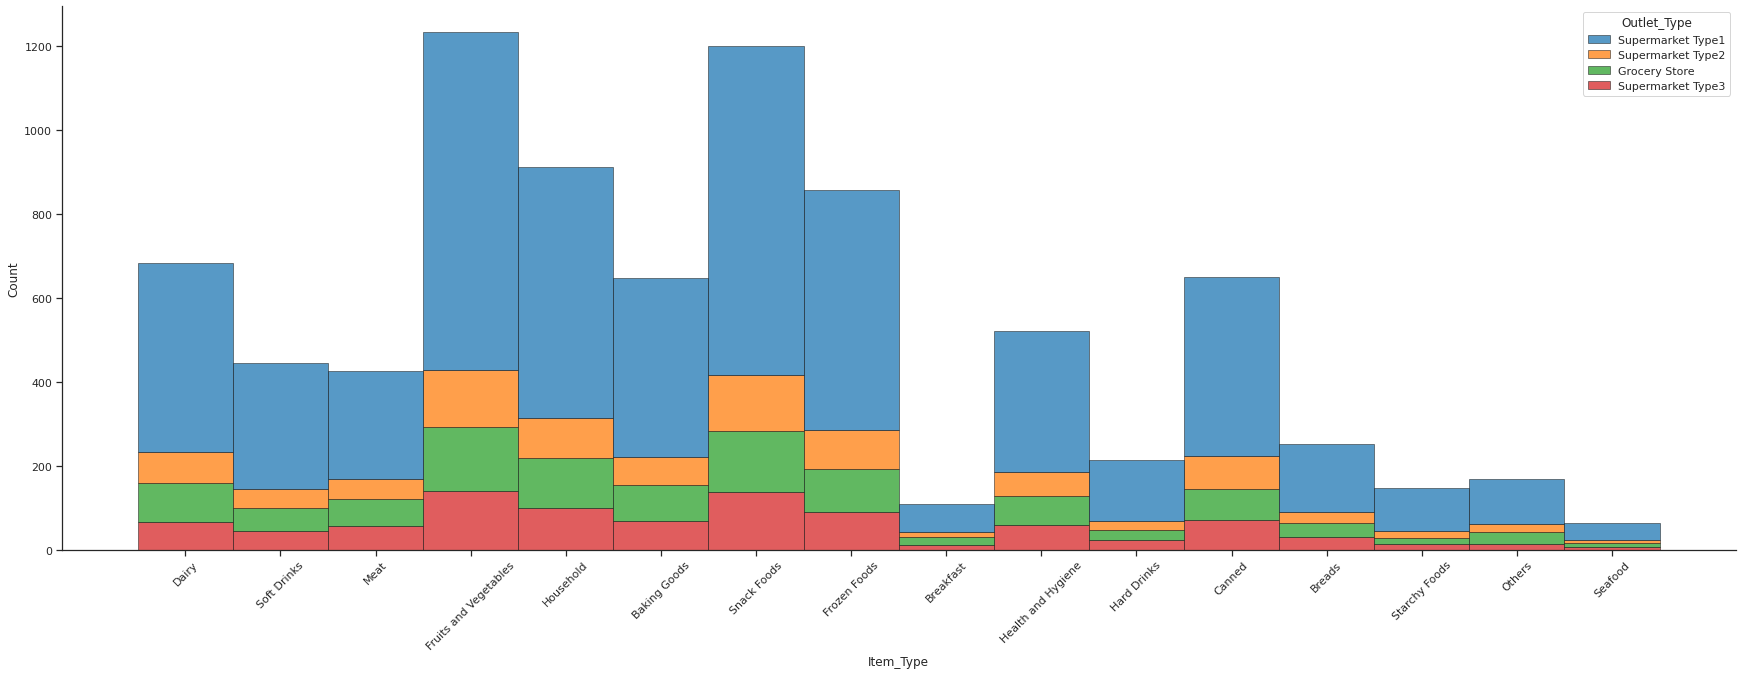

In [ ]:
sns.set_theme(style='ticks')
f,ax=plt.subplots(figsize=(30,10))
sns.despine(f)

sns.histplot(
    sales_data,
    x='Item_Type',hue='Outlet_Type',
    edgecolor='k',
    palette='tab10',
    linewidth=.5,
    multiple='stack',
)
plt.xticks(rotation=45)

By running this histogram I'm looking at what types of food each location type sells the most or least of. What I've found though is that the supermarket 1 type is so large and in such a high populated area that it will inevitably sell more of everything than the supermarket 3.

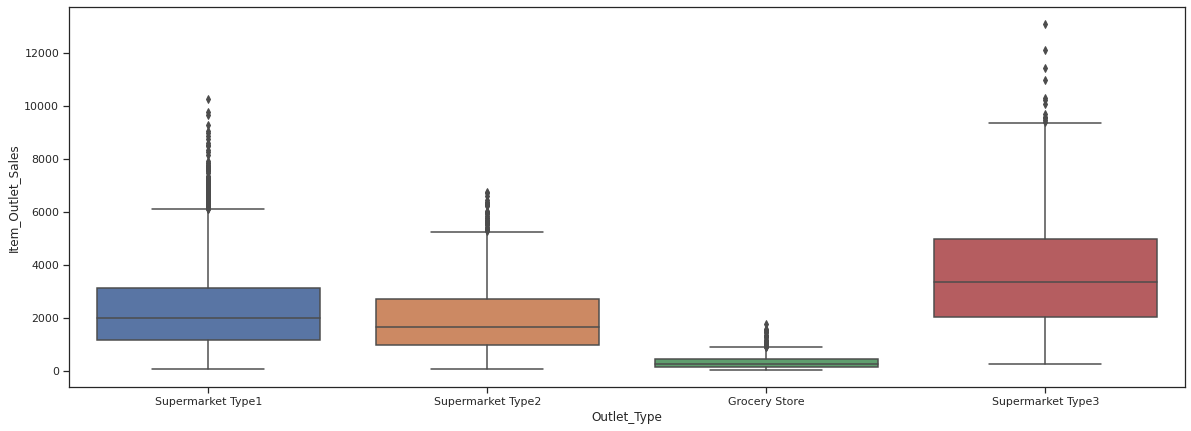

In [ ]:
f,ax=plt.subplots(figsize=(20,7))
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=sales_data)


Here I can see that there are some significant outliers in item sales for supermarket 3. I would like to look at this further to see what those items could be.

([0, 1], <a list of 2 Text major ticklabel objects>)

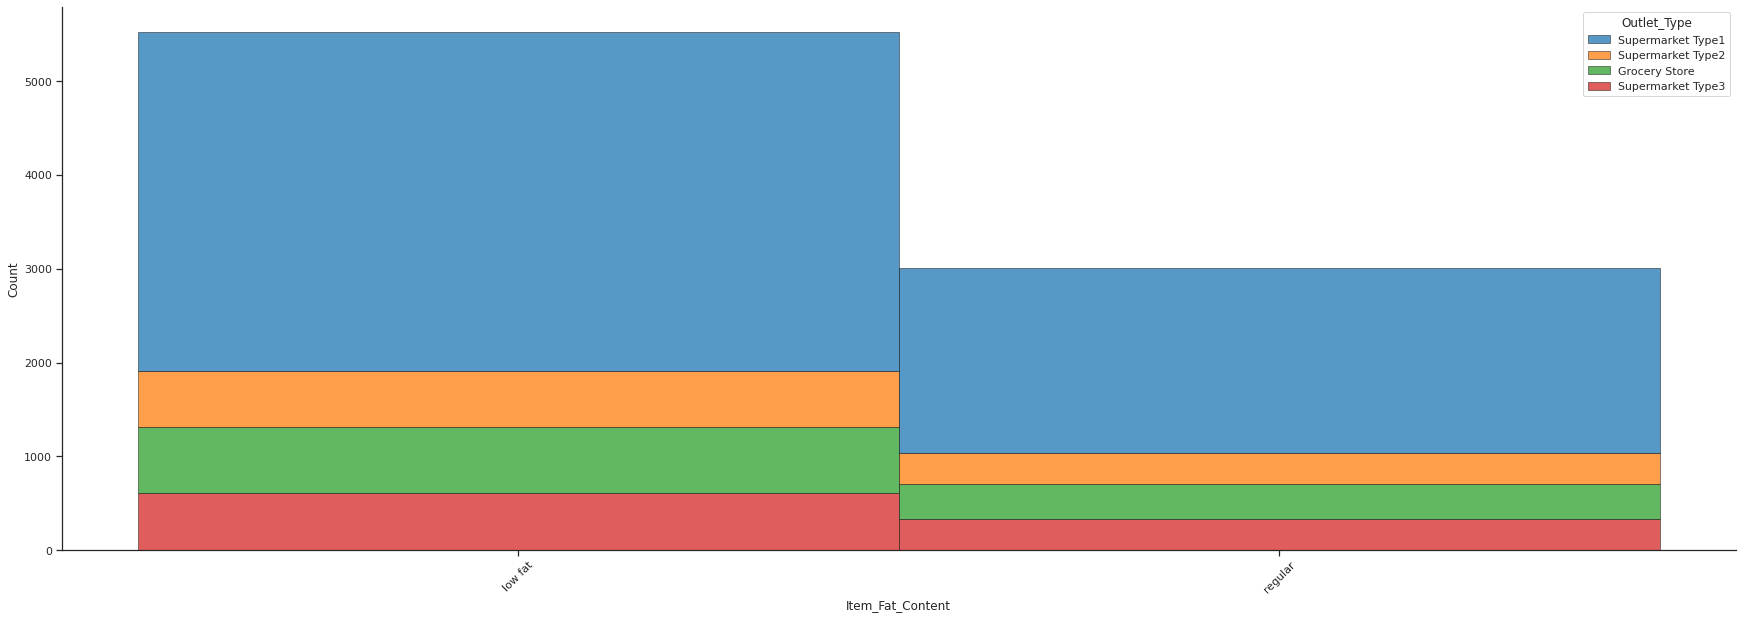

In [ ]:
sns.set_theme(style='ticks')
f,ax=plt.subplots(figsize=(30,10))
sns.despine(f)

sns.histplot(
    sales_data,
    x='Item_Fat_Content',hue='Outlet_Type',
    edgecolor='k',
    palette='tab10',
    linewidth=.5,
    multiple='stack',
)
plt.xticks(rotation=45)

Here I have found that in all location types there are more low fat items than regular items. It will be interesting to see how sales for those items correlates. 

In [ ]:
sales_data.groupby('Item_Outlet_Sales').Item_Fat_Content.value_counts()

Item_Outlet_Sales  Item_Fat_Content
33.2900            low fat             2
33.9558            regular             1
34.6216            low fat             1
35.2874            regular             1
36.6190            low fat             2
                                      ..
10306.5840         regular             1
10993.6896         low fat             1
11445.1020         low fat             1
12117.5600         regular             1
13086.9648         low fat             1
Name: Item_Fat_Content, Length: 4737, dtype: int64

In [ ]:
fat_sales=(sales_data.groupby('Item_Outlet_Sales').Item_Fat_Content.value_counts())

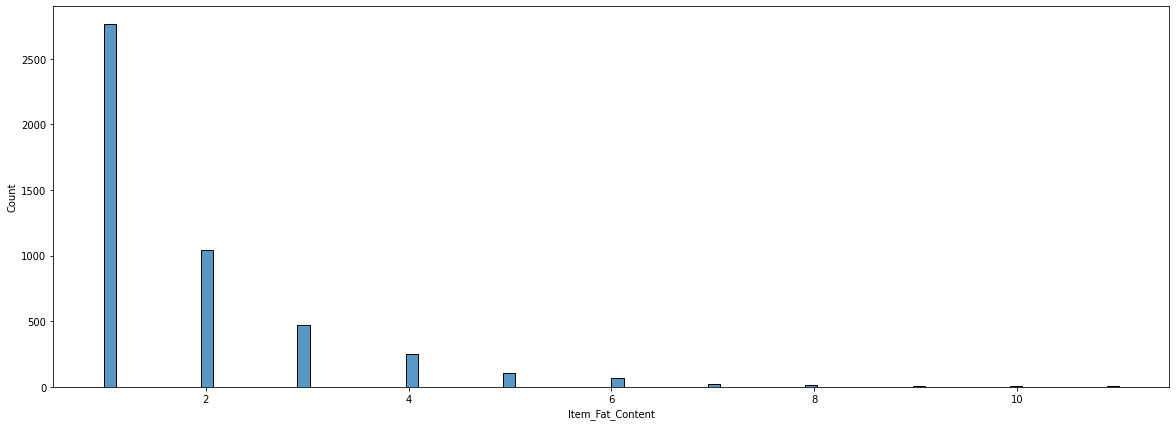

In [ ]:
f,ax=plt.subplots(figsize=(20,7))
sns.histplot(fat_sales);


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

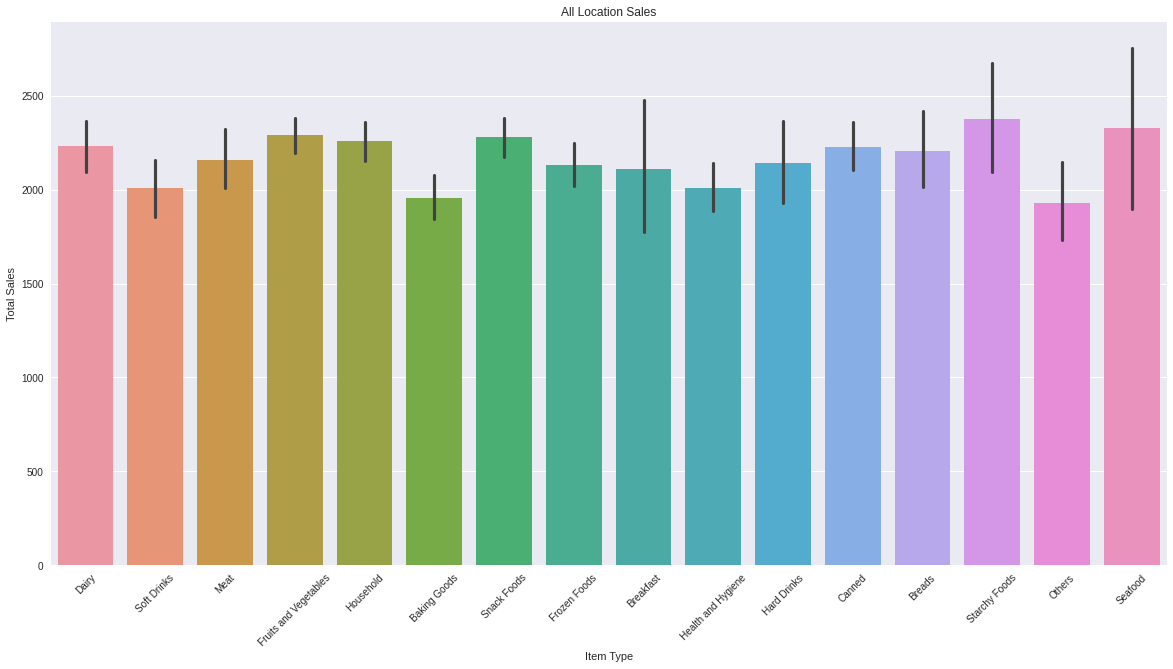

In [206]:

plt.figure(figsize=(20,10))
p=sns.barplot(data=sales_data,x='Item_Type',y='Item_Outlet_Sales')
p.set_xlabel('Item Type')
p.set_ylabel('Total Sales')
p.set_title('All Location Sales')
plt.xticks(rotation=45)

In [64]:
dairy_filter=sales_data['Item_Type']=='Dairy'
dairy=sales_data.loc[dairy_filter,:]


In [100]:
soft_drinks_filter=sales_data['Item_Type']=='Soft Drinks'

meat_filter=sales_data['Item_Type']=='Meat'

fruits_filter=sales_data['Item_Type']=='Fruits and Vegetables'

household_filter=sales_data['Item_Type']=='Household'

baking_filter=sales_data['Item_Type']=='Baking Goods'

snack_filter=sales_data['Item_Type']=='Snack Foods'

frozen_filter=sales_data['Item_Type']=='Frozen Foods'

breakfast_filter=sales_data['Item_Type']=='Breakfast'

health_filter=sales_data['Item_Type']=='Health and Hygiene'

alcohol_filter=sales_data['Item_Type']=='Hard Drinks'

canned_filter= sales_data['Item_Type']=='Canned'

bread_filter=sales_data['Item_Type']=='Breads'

starch_filter=sales_data['Item_Type']=='Starchy Foods'

other_filter=sales_data['Item_Type']=='Others'

seafood_filter=sales_data['Item_Type']=='Seafood'

grocery_filter=sales_data['Outlet_Type']=='Grocery Store'

supermarket1_filter=sales_data['Outlet_Type']=='Supermarket Type1'
supermarket2_filter=sales_data['Outlet_Type']=='Supermarket Type2'
supermarket3_filter=sales_data['Outlet_Type']=='Supermarket Type3'

In [101]:
soft_drinks=sales_data.loc[soft_drinks_filter,:]
meat=sales_data.loc[meat_filter,:]
fruits=sales_data.loc[fruits_filter,:]
household=sales_data.loc[household_filter,:]
baking=sales_data.loc[baking_filter,:]
snack=sales_data.loc[snack_filter,:]
frozen=sales_data.loc[frozen_filter,:]
breakfast=sales_data.loc[breakfast_filter,:]
health=sales_data.loc[health_filter,:]
alcohol=sales_data.loc[alcohol_filter,:]
canned=sales_data.loc[canned_filter,:]
starch=sales_data.loc[starch_filter,:]
others=sales_data.loc[other_filter,:]
seafood=sales_data.loc[seafood_filter,:]
breads=sales_data.loc[bread_filter,:]
grocery=sales_data.loc[grocery_filter,:]
supermarket1=sales_data.loc[supermarket1_filter,:]
supermarket2=sales_data.loc[supermarket2_filter,:]
supermarket3=sales_data.loc[supermarket3_filter,:]

Text(0.5, 1.0, 'Soft Drinks sales per Store Type')

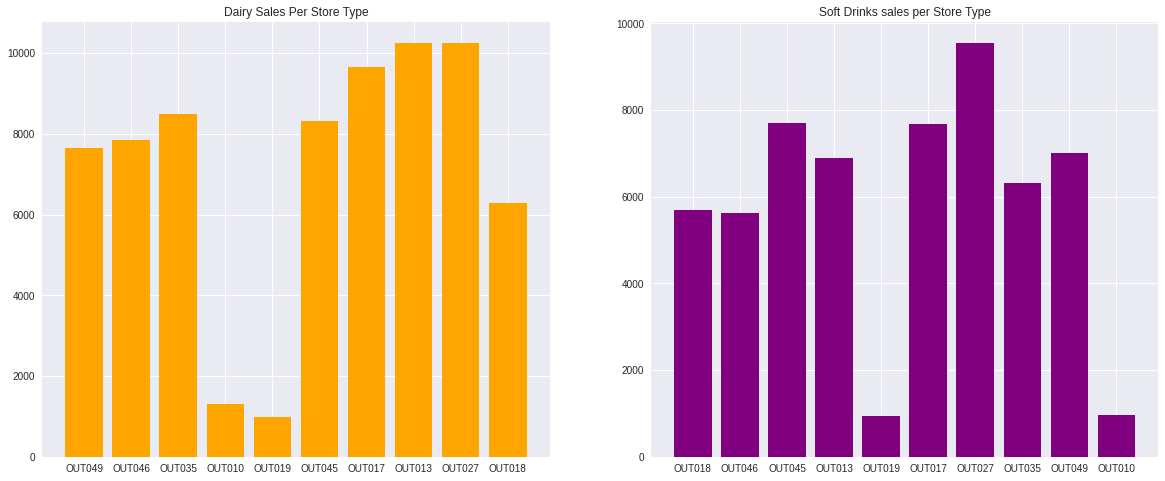

In [176]:
plt.figure(figsize=(20,8))
plt.style.use('seaborn')
plt.subplot(1,2,1);
plt.bar(dairy['Outlet_Identifier'].values, dairy['Item_Outlet_Sales'].values,color='orange');
plt.title('Dairy Sales Per Store Type')
plt.subplot(1,2,2)
plt.bar(soft_drinks['Outlet_Identifier'].values, soft_drinks['Item_Outlet_Sales'].values,color='purple');
plt.title('Soft Drinks sales per Store Type')


Text(0.5, 1.0, 'Fruits and Vegetables Sales per Store Type')

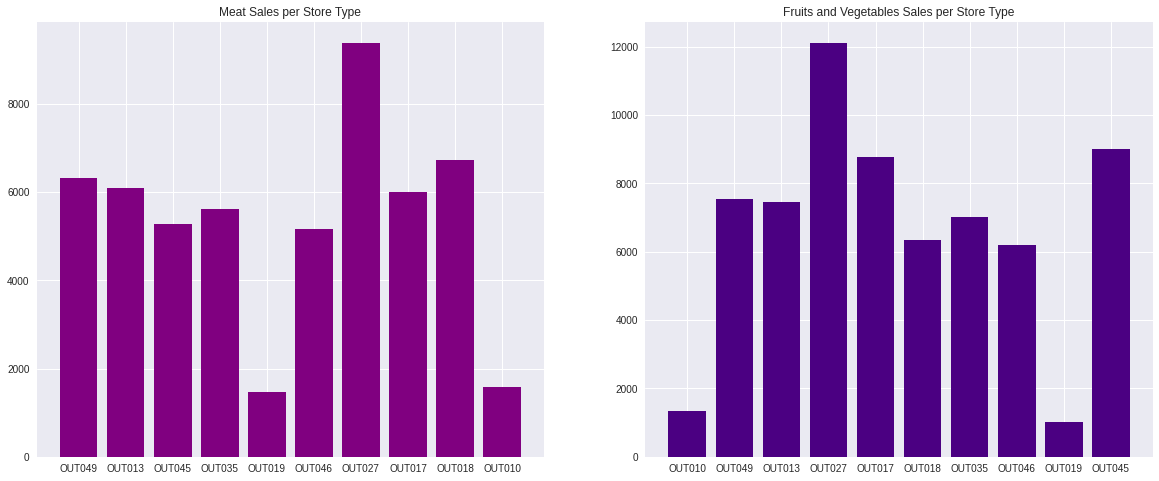

In [177]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1);
plt.bar(meat['Outlet_Identifier'].values, meat['Item_Outlet_Sales'].values,color='purple');
plt.title('Meat Sales per Store Type')
plt.subplot(1,2,2);
plt.bar(fruits['Outlet_Identifier'].values, fruits['Item_Outlet_Sales'].values,color='indigo');
plt.title('Fruits and Vegetables Sales per Store Type')

Text(0.5, 1.0, 'Baked Goods Sales per Store Type')

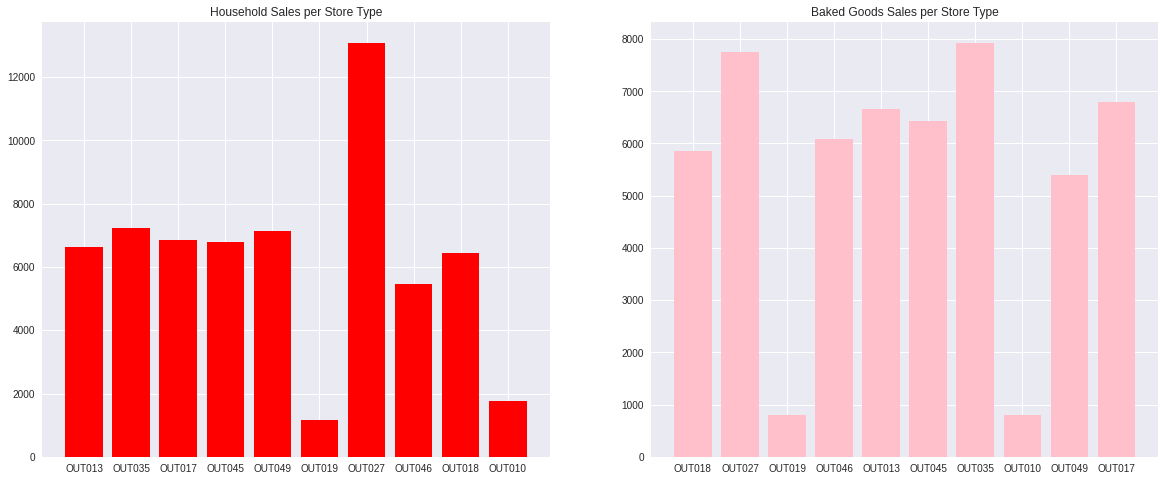

In [178]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1);
plt.bar(household['Outlet_Identifier'].values, household['Item_Outlet_Sales'].values,color='red');
plt.title('Household Sales per Store Type')
plt.subplot(1,2,2);
plt.bar(baking['Outlet_Identifier'].values, baking['Item_Outlet_Sales'].values,color='pink');
plt.title('Baked Goods Sales per Store Type')

Text(0.5, 1.0, 'Health and Hygiene Sales per Store Type')

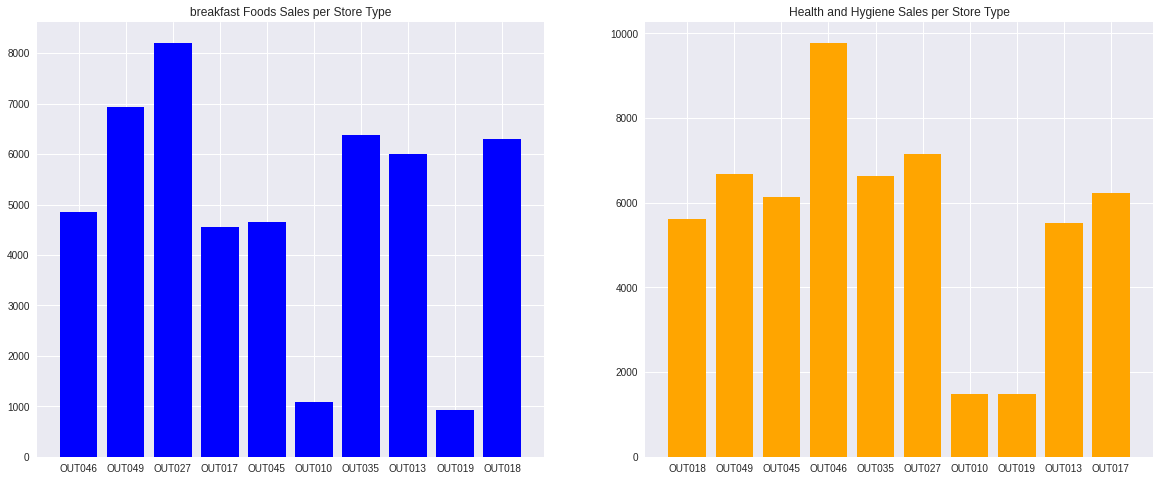

In [179]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1);
plt.bar(breakfast['Outlet_Identifier'].values, breakfast['Item_Outlet_Sales'].values,color='blue');
plt.title('breakfast Foods Sales per Store Type')
plt.subplot(1,2,2);
plt.bar(health['Outlet_Identifier'].values, health['Item_Outlet_Sales'].values,color='orange');
plt.title('Health and Hygiene Sales per Store Type')

Text(0.5, 1.0, 'Frozen Foods Sales per Store Type')

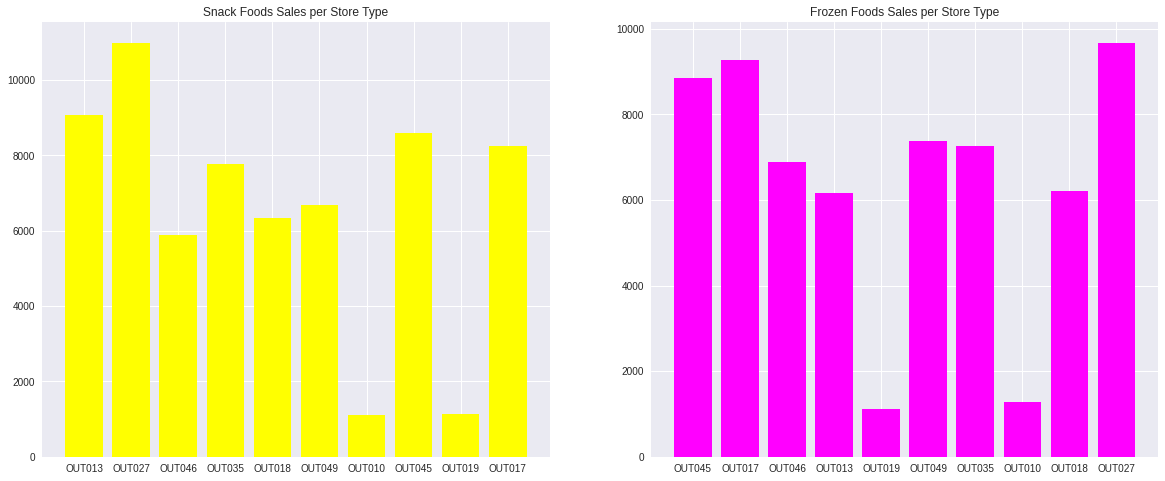

In [180]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1);
plt.bar(snack['Outlet_Identifier'].values, snack['Item_Outlet_Sales'].values,color='yellow');
plt.title('Snack Foods Sales per Store Type')
plt.subplot(1,2,2);
plt.bar(frozen['Outlet_Identifier'].values, frozen['Item_Outlet_Sales'].values,color='magenta');
plt.title('Frozen Foods Sales per Store Type')

Text(0.5, 1.0, 'Canned Goods Sales per Store Type')

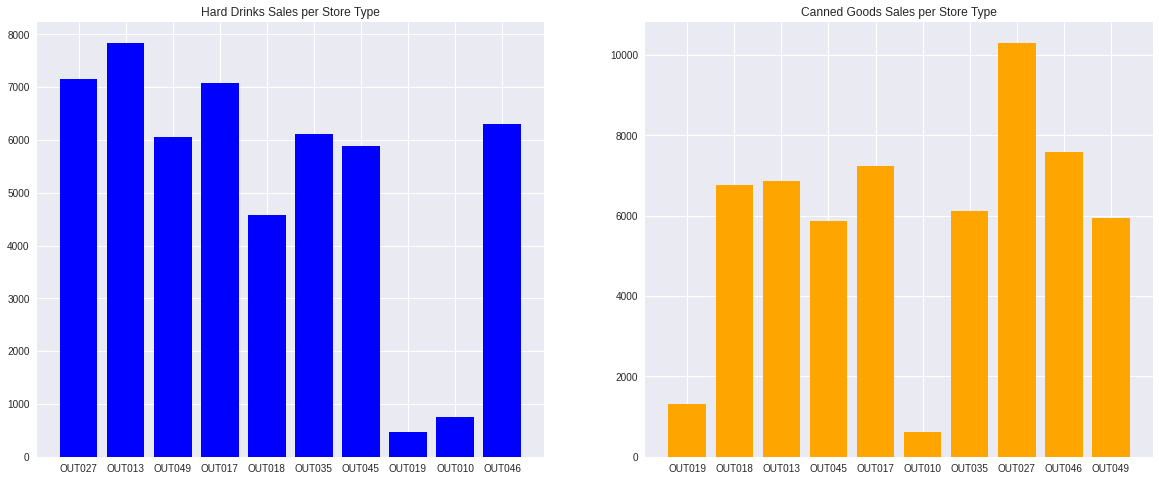

In [181]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1);
plt.bar(alcohol['Outlet_Identifier'].values, alcohol['Item_Outlet_Sales'].values,color='blue');
plt.title('Hard Drinks Sales per Store Type')
plt.subplot(1,2,2);
plt.bar(canned['Outlet_Identifier'].values,canned['Item_Outlet_Sales'].values,color='orange');
plt.title('Canned Goods Sales per Store Type')

Text(0.5, 1.0, 'Other Sales per Store Type')

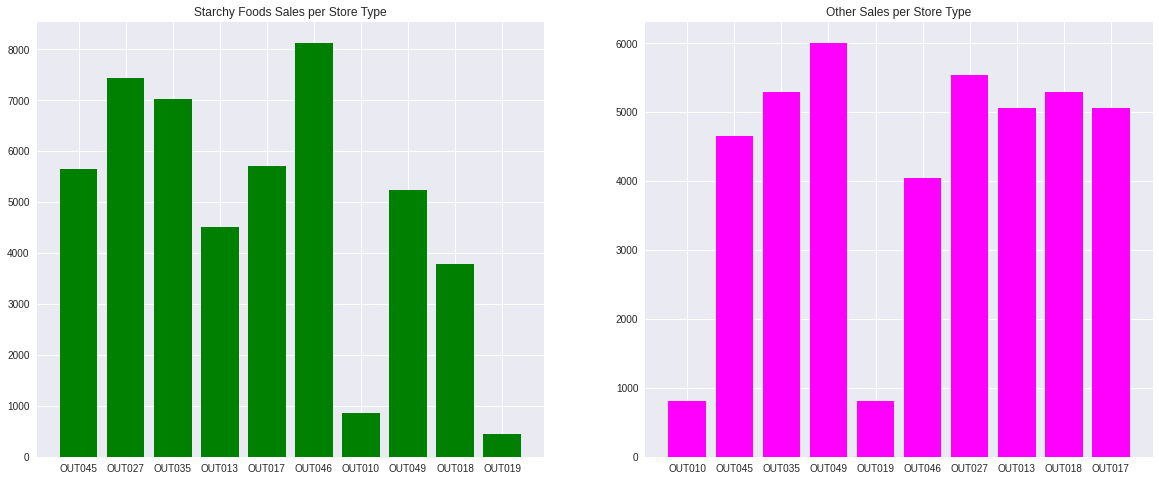

In [182]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1);
plt.bar(starch['Outlet_Identifier'].values, starch['Item_Outlet_Sales'].values,color='green');
plt.title('Starchy Foods Sales per Store Type')
plt.subplot(1,2,2);
plt.bar(others['Outlet_Identifier'].values, others['Item_Outlet_Sales'].values,color='magenta');
plt.title('Other Sales per Store Type')

Text(0.5, 1.0, 'Breads Sales per Store Type')

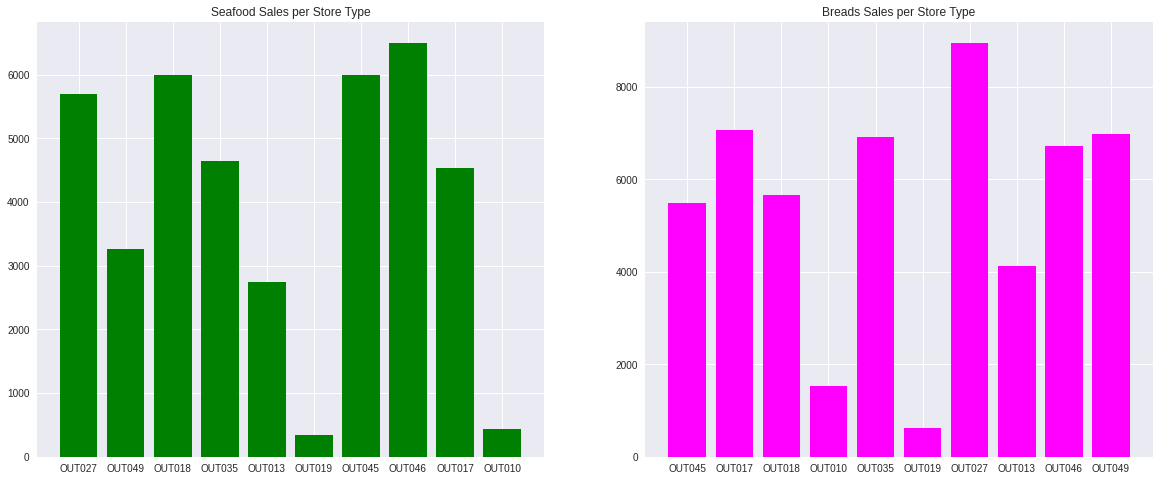

In [200]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1);
plt.bar(seafood['Outlet_Identifier'].values, seafood['Item_Outlet_Sales'].values,color='green');

plt.title('Seafood Sales per Store Type')
plt.subplot(1,2,2);
plt.bar(breads['Outlet_Identifier'].values, breads['Item_Outlet_Sales'].values,color='magenta');
plt.title('Breads Sales per Store Type')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Grocery Store Sales')

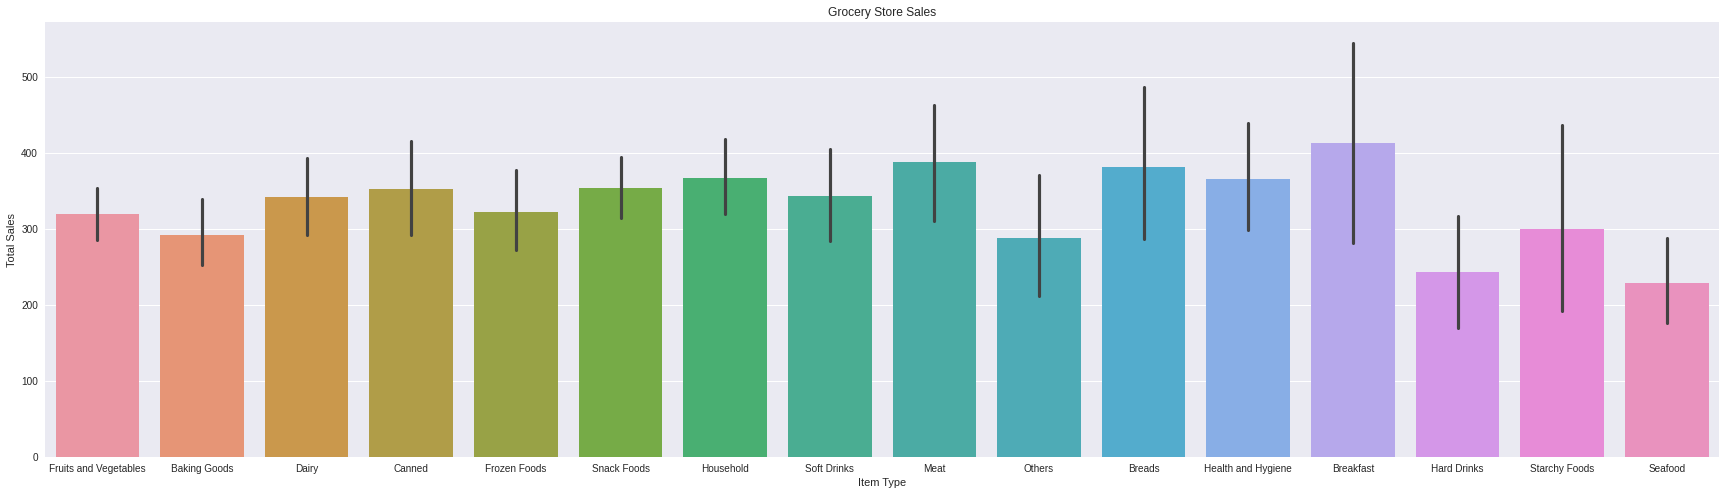

In [207]:
plt.figure(figsize=(30,8))
b=sns.barplot(grocery['Item_Type'].values, grocery['Item_Outlet_Sales'].values)
b.set_xlabel('Item Type')
b.set_ylabel('Total Sales')
b.set_title('Grocery Store Sales')


It appears that grocery stores (locations OUT010 and OUT019) sell breakfast, meat and bread items the most. Hard Drinks and seafood the least. I can see from using the groupby function that OUT010 is in tier 3 which has the highest item sales. My guess is there is another larger store nearby that people do most of their shopping at. OUT019 performs the worst in every category and is one of the two oldest locations. The company might want to consider either making this location larger to attract more customers or closing this location and using it's resources for other higher performing locations. Hard Drinks and seafood sell more than 'other' which leads me to believe that shrinking Hard drinks and seafood to make room for other items would be effective. 

In [161]:
sales_data.value_counts('Outlet_Location_Type')

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
dtype: int64

In [173]:
sales_data.groupby(['Outlet_Identifier'])['Outlet_Location_Type'].value_counts()

Outlet_Identifier  Outlet_Location_Type
OUT010             Tier 3                  555
OUT013             Tier 3                  932
OUT017             Tier 2                  926
OUT018             Tier 3                  928
OUT019             Tier 1                  528
OUT027             Tier 3                  935
OUT035             Tier 2                  930
OUT045             Tier 2                  929
OUT046             Tier 1                  930
OUT049             Tier 1                  930
Name: Outlet_Location_Type, dtype: int64

In [201]:
sales_data.groupby(['Outlet_Identifier'])['Outlet_Establishment_Year'].value_counts()

Outlet_Identifier  Outlet_Establishment_Year
OUT010             1998                         555
OUT013             1987                         932
OUT017             2007                         926
OUT018             2009                         928
OUT019             1985                         528
OUT027             1985                         935
OUT035             2004                         930
OUT045             2002                         929
OUT046             1997                         930
OUT049             1999                         930
Name: Outlet_Establishment_Year, dtype: int64

In [167]:
sales_data.value_counts('Outlet_Identifier')

Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
dtype: int64

In [165]:
sales_data.groupby(['Outlet_Location_Type'])['Item_MRP'].max()

Outlet_Location_Type
Tier 1    266.8884
Tier 2    266.8884
Tier 3    266.6884
Name: Item_MRP, dtype: float64

Text(0.5, 1.0, 'Total Sales Compared to MRP')

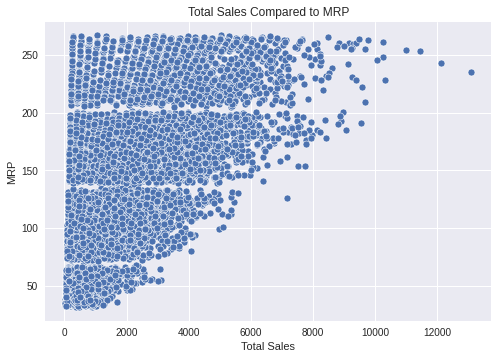

In [193]:
s=sns.scatterplot(data=sales_data,x='Item_Outlet_Sales',y='Item_MRP')

s.set_xlabel('Total Sales')
s.set_ylabel('MRP')
s.set_title('Total Sales Compared to MRP')